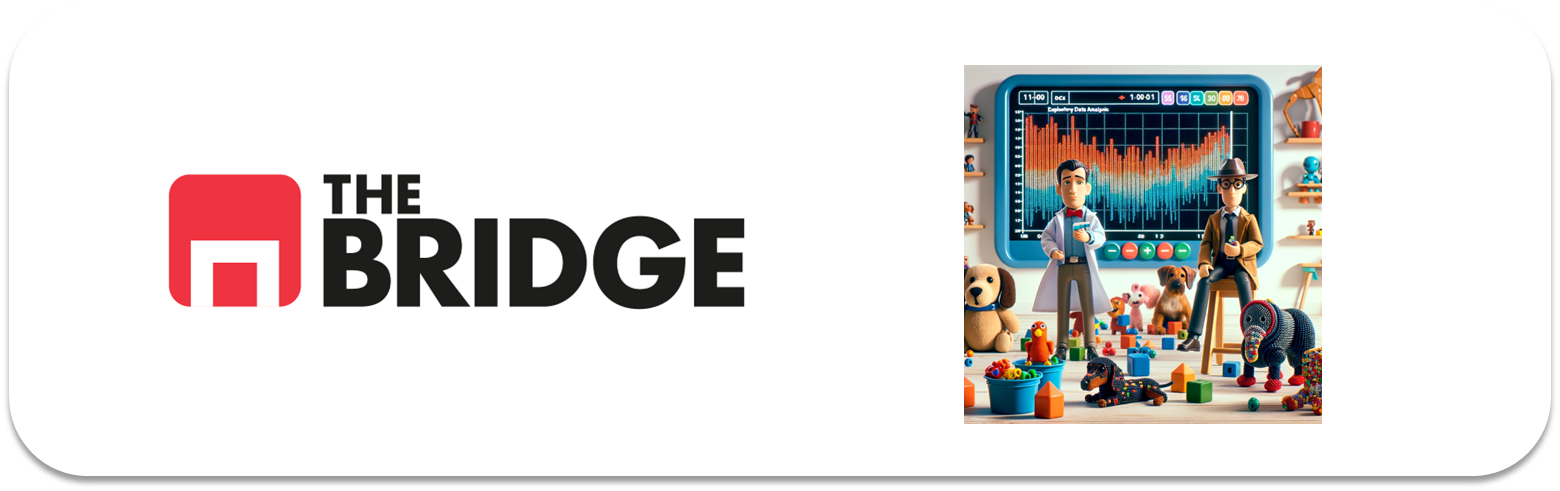

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import bootcampviztools

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [3]:
df_titanic.drop(columns=["deck","survived","pclass","embarked"], inplace=True)

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [4]:
df_titanic["family_member"] = df_titanic["parch"] + df_titanic["sibsp"]

In [5]:
df_titanic

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_member
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [8]:
df_titanic.loc[df_titanic["embark_town"].isna(), "embark_town"] = df_titanic["embark_town"].mode()[0]

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [9]:
df_titanic.who.unique()

array(['man', 'woman', 'child'], dtype=object)

In [12]:
df_titanic["age"].where(df_titanic["who"]=="man",)

0      22.0
1       NaN
2       NaN
3       NaN
4      35.0
       ... 
886    27.0
887     NaN
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [15]:
media_hombres = df_titanic.loc[df_titanic.who == "man"]["age"].mean()
media_mujeres = df_titanic.loc[df_titanic.who == "woman"]["age"].mean()
media_child = df_titanic.loc[df_titanic.who == "child"]["age"].mean()

df_titanic.loc[(df_titanic.age.isna()) & (df_titanic.who =="man") ,"age"] = media_hombres
df_titanic.loc[(df_titanic.age.isna()) & (df_titanic.who =="woman") ,"age"] = media_mujeres
df_titanic.loc[(df_titanic.age.isna()) & (df_titanic.who =="child") ,"age"] = media_child

In [27]:
df_titanic.loc[df_titanic.who == "woman"]

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_member
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,1
8,female,27.0,0,2,11.1333,Third,woman,False,Southampton,yes,False,2
11,female,58.0,0,0,26.5500,First,woman,False,Southampton,yes,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...
880,female,25.0,0,1,26.0000,Second,woman,False,Southampton,yes,False,1
882,female,22.0,0,0,10.5167,Third,woman,False,Southampton,no,True,0
885,female,39.0,0,5,29.1250,Third,woman,False,Queenstown,no,False,5
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True,0


In [16]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sex            891 non-null    object 
 1   age            891 non-null    float64
 2   sibsp          891 non-null    int64  
 3   parch          891 non-null    int64  
 4   fare           891 non-null    float64
 5   class          891 non-null    object 
 6   who            891 non-null    object 
 7   adult_male     891 non-null    bool   
 8   embark_town    891 non-null    object 
 9   alive          891 non-null    object 
 10  alone          891 non-null    bool   
 11  family_member  891 non-null    int64  
dtypes: bool(2), float64(2), int64(3), object(5)
memory usage: 71.5+ KB


RESUMEN PASOS ANALISIS BIVARIANTE
Establece una lista de combinaciones que quieras analizar sí o sí: Básate en las preguntas e hipótesis de partida que tengas, en la prioridad de las variables y en los resultados y notas de tu análisis univariante.
Aplica a cada combinación lo que has visto en el workout. Ahora ya empezarán a salir mensajes y conclusiones que sí pueden aparecer en el informe y presentación finales. Puede que surjan otras hipótesis y tengas que volver atrás.
Si tienes muestras y quieres extrapolar resultados, acuerdate de aplicar el contraste de hipótesis.
Haz una lista de preguntas que puedas responder ya y busca esa respuesta (ya no va de analizar sistemáticamente sino de filtrar, operar, agrupar los dataframes hasta que encuentres ese respuesta). Por ejemplo: No hace falta esperar para ver con más detalle qué ocurre con las ofertas de tipo 2 las que tenían más exito que el resto de ofertas.
Lánzate a analizar varias variables a la vez (más de 2) siempre guiado por las preguntas e hipótesis.

### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [17]:
df_tipificacion = pd.DataFrame([df_titanic.nunique(), df_titanic.nunique()/len(df_titanic)*100, df_titanic.dtypes]).T.rename(columns={0:"Card",1:"%_card",2:"tipo"})
df_tipificacion

,Card,%_card,tipo
sex,2,0.224467,object
age,89,9.988777,float64
sibsp,7,0.785634,int64
parch,7,0.785634,int64
fare,248,27.833895,float64
class,3,0.3367,object
who,3,0.3367,object
adult_male,2,0.224467,bool
embark_town,3,0.3367,object
alive,2,0.224467,object


In [18]:
df_tipificacion["Clasificada_como"] = "Categorica"
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion.Card > 10, "Clasificada_como"] = "Numerica Discreta"
df_tipificacion.loc[df_tipificacion.Card > 10, "Clasificada_como"] = "Numerica Continua"

In [19]:
categoricas_titanic = df_tipificacion.loc[(df_tipificacion["Clasificada_como"] == "Categorica") | (df_tipificacion["Clasificada_como"] == "Binaria")].index

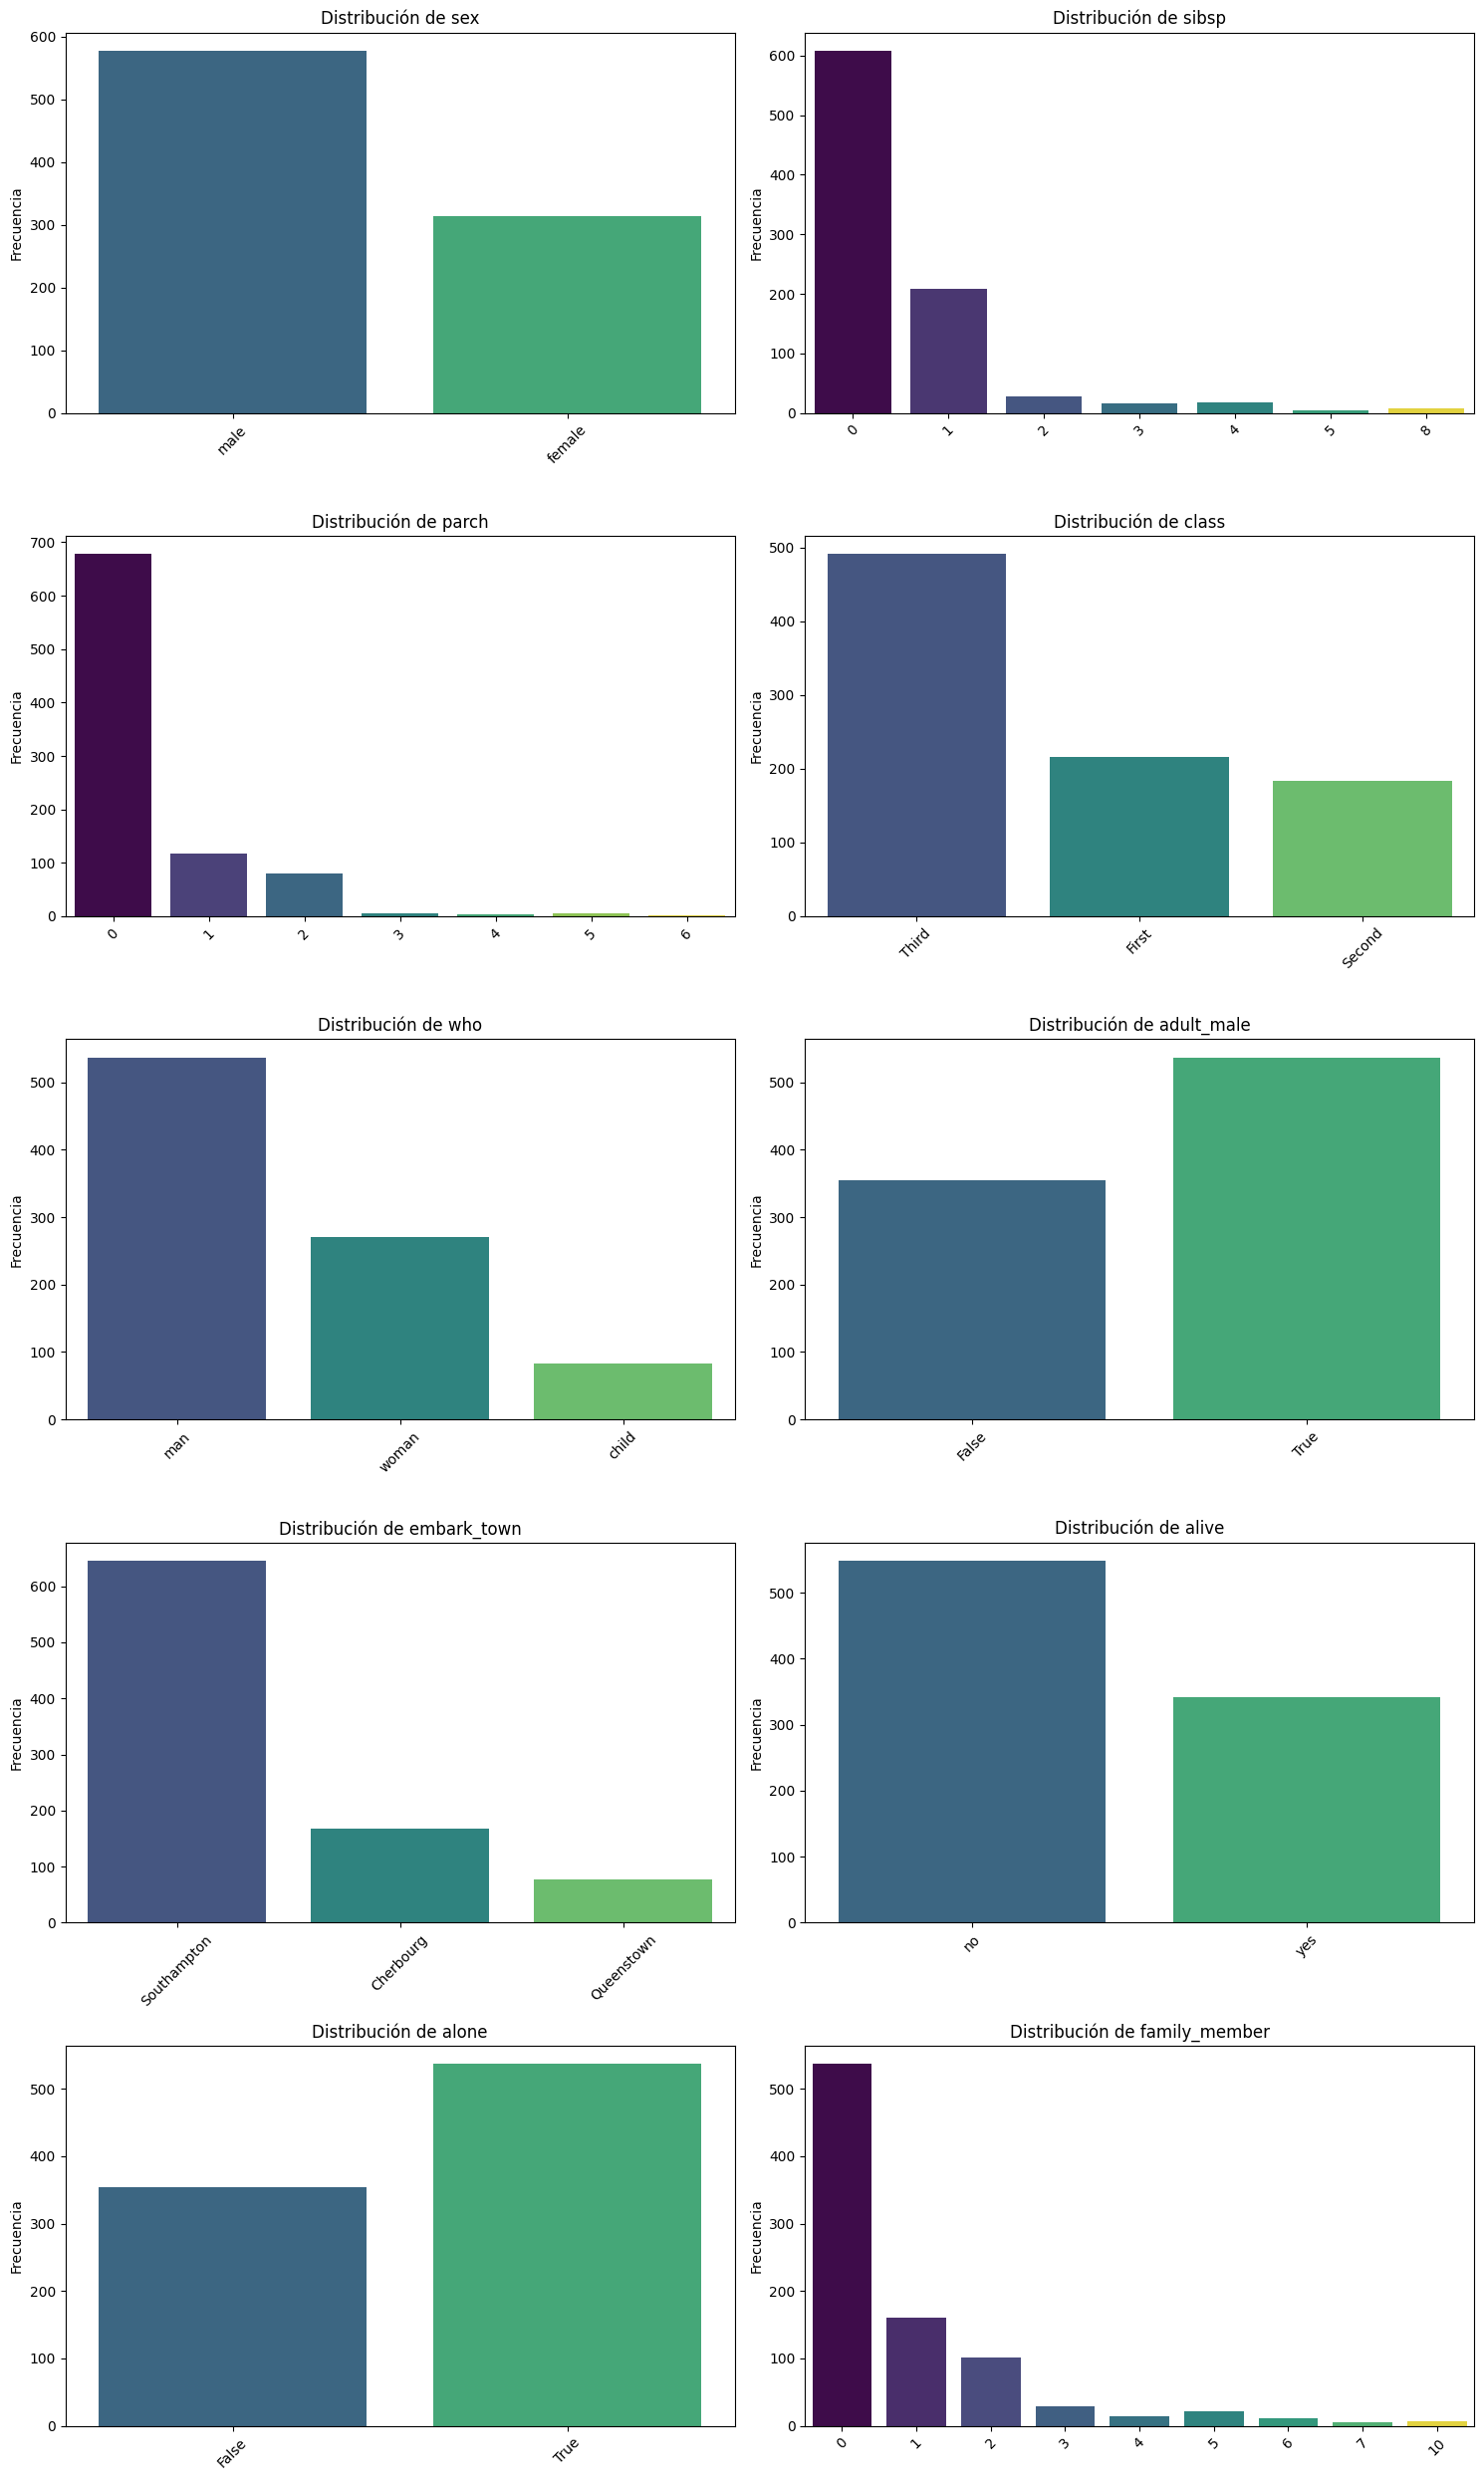

In [39]:
bootcampviztools.pinta_distribucion_categoricas(df_titanic, categoricas_titanic)

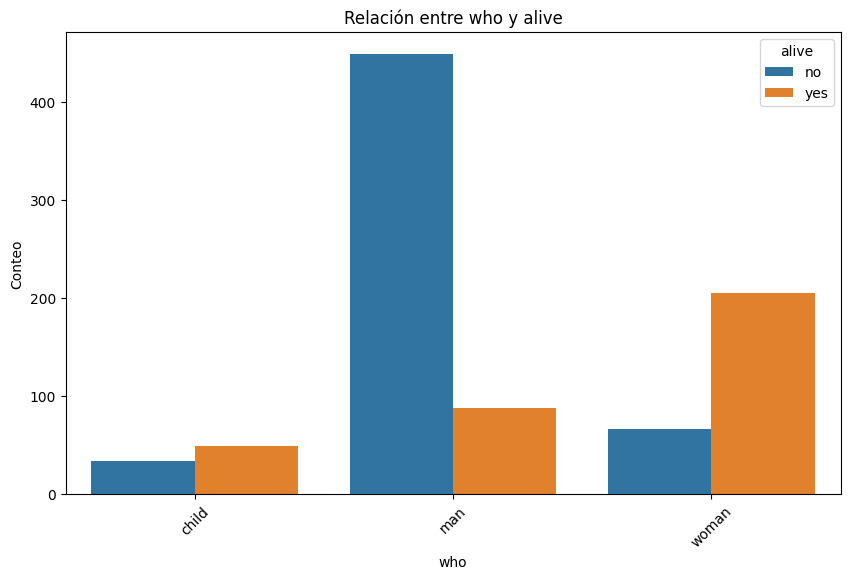

In [42]:
bootcampviztools.plot_categorical_relationship_fin(df_titanic,"who","alive")

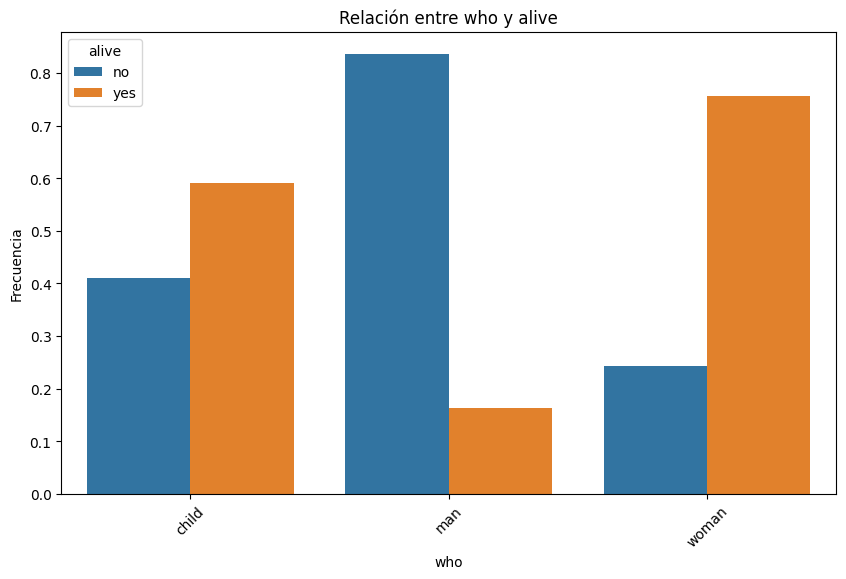

In [40]:
bootcampviztools.plot_categorical_relationship_fin(df_titanic,"who","alive", relative_freq=True)

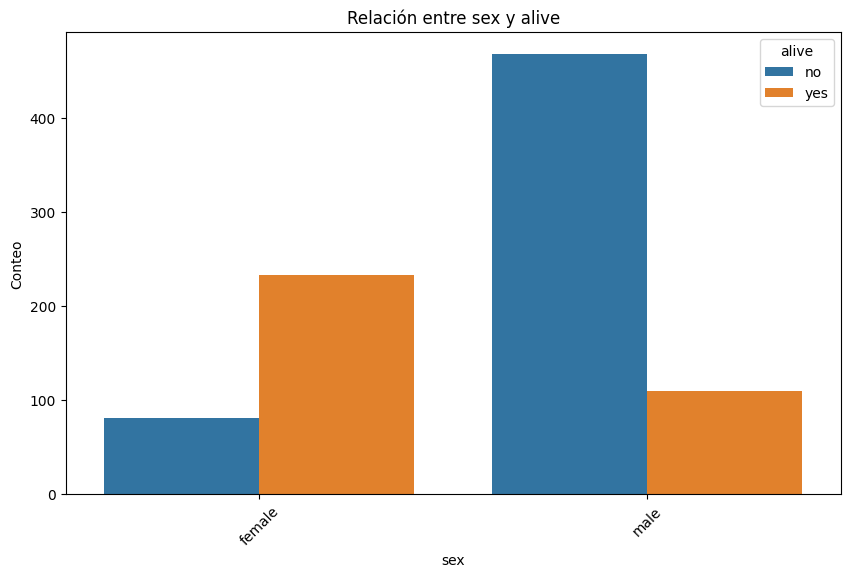

In [48]:
bootcampviztools.plot_categorical_relationship_fin(df_titanic,"sex","alive", relative_freq=False)

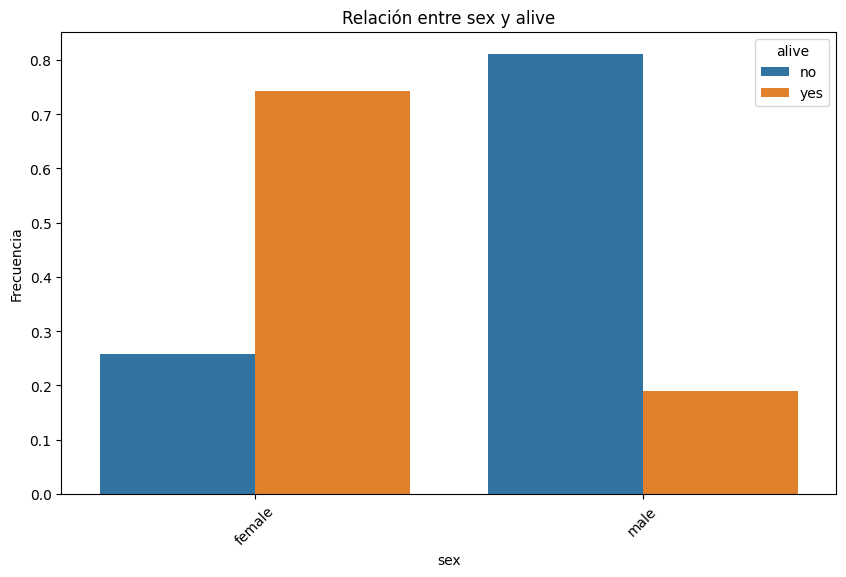

In [43]:
bootcampviztools.plot_categorical_relationship_fin(df_titanic,"sex","alive", relative_freq=True)

In [57]:
#aplicamos el Test Chi-Cuadrado (χ²)
tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['sex'])

tabla_contingencia

sex,female,male
alive,,
no,81,468
yes,233,109


In [58]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 260.71702016732104
P-Value: 1.197357062775565e-58
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[193.47474747 355.52525253]
 [120.52525253 221.47474747]]


In [44]:
def niño_adulto(df):
    if df == "child":
        return "Niño"
    else:
        return "Adulto"

In [45]:
df_titanic["ninio"] = df_titanic["who"].transform(niño_adulto)

In [59]:
#aplicamos el Test Chi-Cuadrado (χ²)
tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['ninio'])
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 15.556993340077092
P-Value: 8.005497211300109e-05
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[497.85858586  51.14141414]
 [310.14141414  31.85858586]]


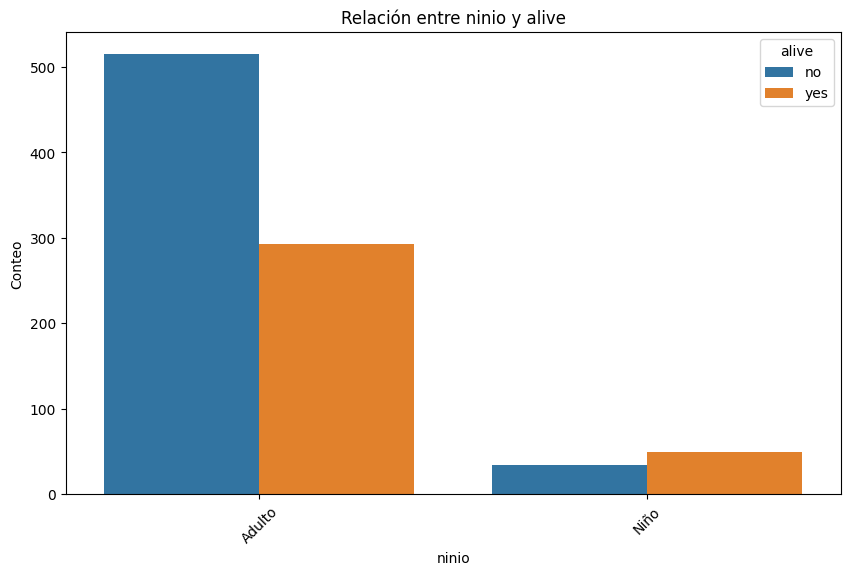

In [47]:
bootcampviztools.plot_categorical_relationship_fin(df_titanic,"ninio","alive", relative_freq=False)

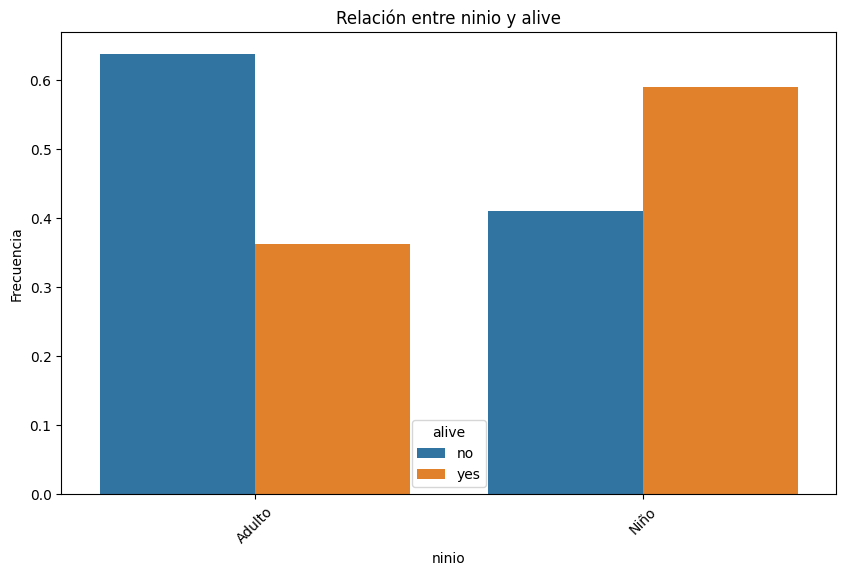

In [46]:
bootcampviztools.plot_categorical_relationship_fin(df_titanic,"ninio","alive", relative_freq=True)

En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

1.  En terminos Absolutos y relativos, sobrevivieron mas Mujeres que hombres y niños auque en terminos relativos las mujeres y los niños se acercan
2.  Si nos fijamos en el sexo, sobrevivieron mas mujeres tanto en terminos relativos como en terminos absolutos. Aplicando el test de ChiCuadrado observamos que hay relacion estadistica entre las variables ya que el valor de P-Value: 1.197357062775565e-58 es menor que 0.05 ya que como hipotesis de partida la independencia de las variables, por lo que si que son dependientes
3.  Si nos fijamos entre ser niño o adulto, sobrevivieron mas niños que adultos en terminos relativos pero no en absoltuos ya que en este ultimo sovbrevivieron mas adultos en numero total. Aplicando el test de ChiCuadrado observamos que hay relacion estadistica entre las variables ya que el valor de P-Value: 8.005497211300109e-05 es menor que 0.05 ya que como hipotesis de partida la independencia de las variables, por lo que si que son dependientes


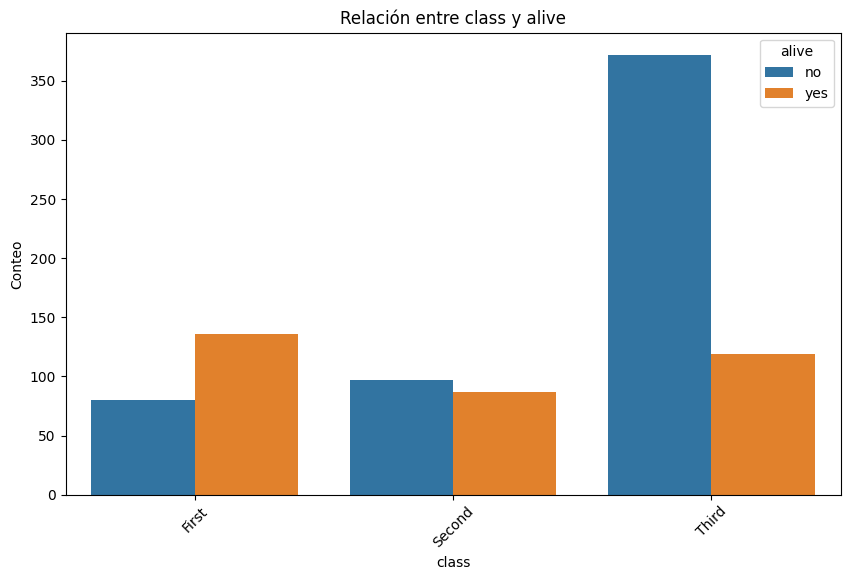

In [52]:
bootcampviztools.plot_categorical_relationship_fin(df_titanic,"class","alive", relative_freq=False)

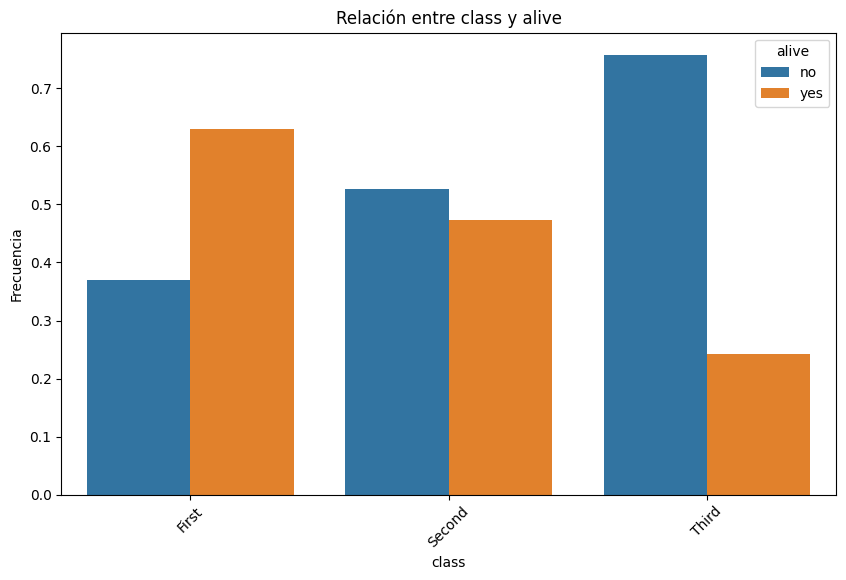

In [53]:
bootcampviztools.plot_categorical_relationship_fin(df_titanic,"class","alive", relative_freq=True)

In [60]:
#aplicamos el Test Chi-Cuadrado (χ²)
tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['class'])
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?
1. En termino absolutos hay mas supervivientes que estuvieron en primera clase, pero los tres valores estan muy parejos. En terminos relativos si que se ve que hay mayor diferencia y hay mas supervivientes que compraron billete en primera clase. Aplicando el test de ChiCuadrado observamos que hay relacion estadistica entre las variables ya que el valor de P-Value: 4.549251711298793e-23 es menor que 0.05 ya que como hipotesis de partida la independencia de las variables, por lo que si que son dependientes

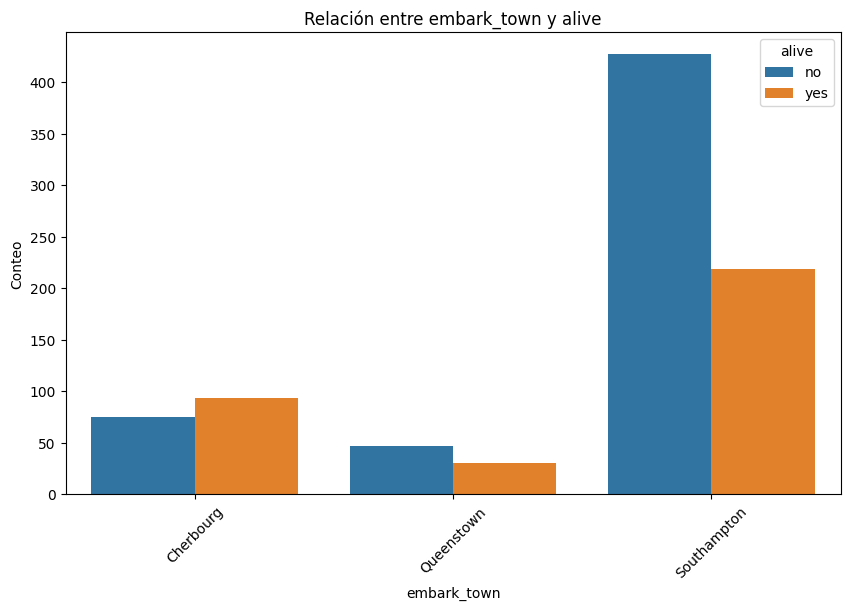

In [62]:
bootcampviztools.plot_categorical_relationship_fin(df_titanic,"embark_town","alive", relative_freq=False)

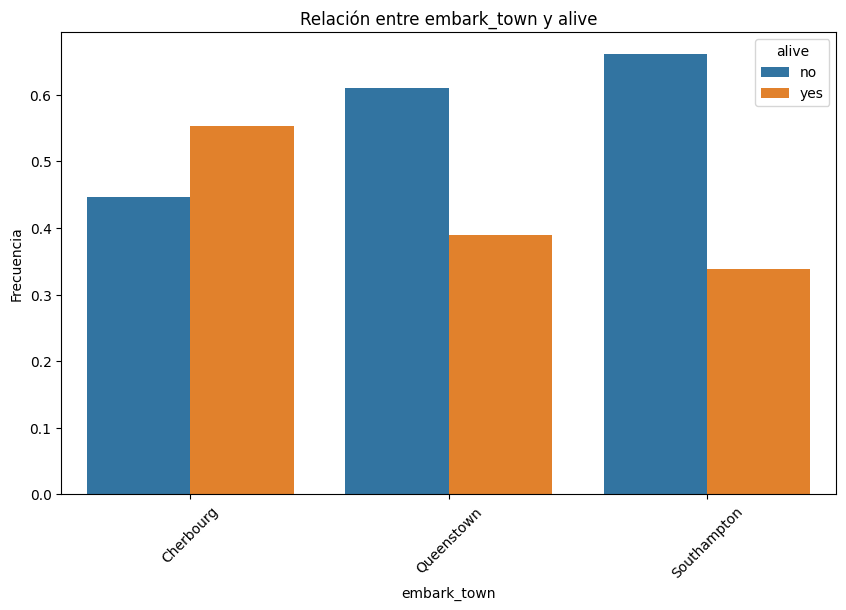

In [63]:
bootcampviztools.plot_categorical_relationship_fin(df_titanic,"embark_town","alive", relative_freq=True)

In [67]:
#aplicamos el Test Chi-Cuadrado (χ²)
tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['embark_town'])
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  47.44444444 398.04040404]
 [ 64.48484848  29.55555556 247.95959596]]


¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?
1. En terminos absolutos sobrevivieron mas personas que embarcaron en Southamoton
2. En terminos relaticos sobrevivieron mas personas que embarcaron en Cherbourg
3. Aplicando el test de ChiCuadrado observamos que hay relacion estadistica entre las variables ya que el valor de P-Value: 2.3008626481449577e-06 es menor que 0.05 ya que como hipotesis de partida la independencia de las variables, por lo que si que son dependientes

In [72]:
Numericas_titanic = df_tipificacion.loc[df_tipificacion["Clasificada_como"] == "Numerica Continua"].index

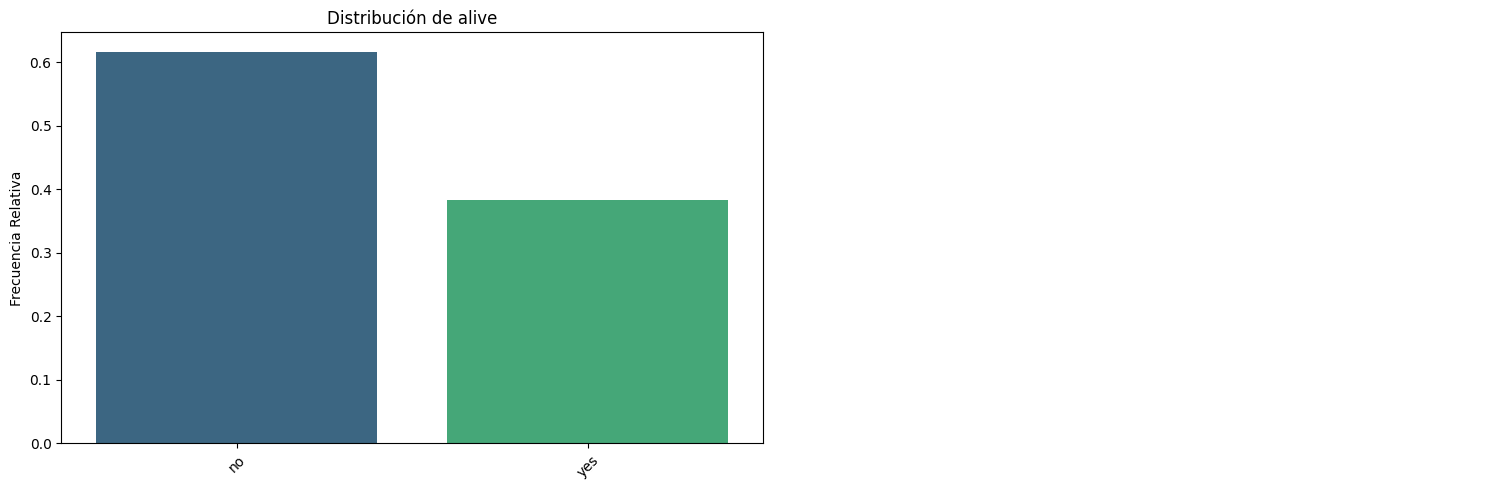

In [73]:
bootcampviztools.pinta_distribucion_categoricas(df_titanic,["alive"], relativa=True)

(2,)


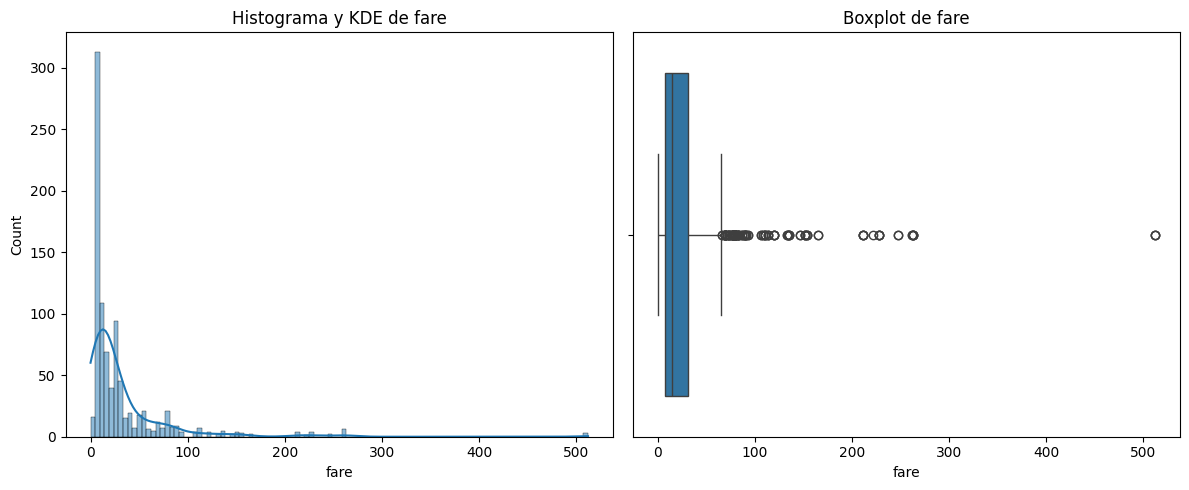

In [74]:
bootcampviztools.plot_combined_graphs(df_titanic, ["fare"])

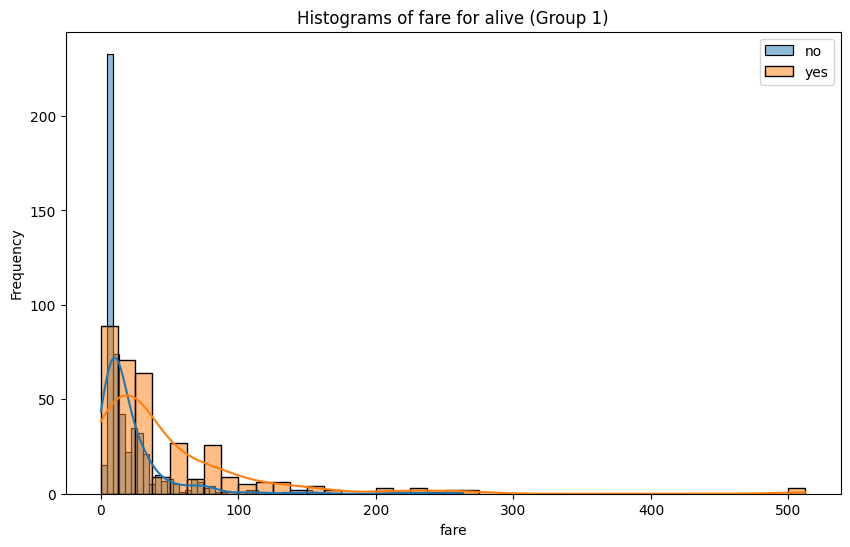

In [75]:
bootcampviztools.plot_grouped_histograms(df_titanic, cat_col="alive", num_col="fare", group_size=2)

In [76]:
#Como no hya una distribucion normal, aplicamos el test de Mann-Whitney
from scipy.stats import mannwhitneyu

#Separar los datos en dos grupos según la variable categórica
grupo_a = df_titanic.loc[df_titanic.alive == "yes"]["fare"]
grupo_b = df_titanic.loc[df_titanic.alive == "no"]["fare"]

#Aplicar la prueba y mostrar los resultados
u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 129951.5
Valor p: 4.553477179250238e-22


¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?
1. pirmero de todo, nuestra hipostesis de partida en el test es que no hay diferencia estadistica significativa entre las medianas de los dos valores, como hemos obtenido un Valor p: 4.553477179250238e-22 que es menor que 0.05 rechazamos la hipoteis y concluimos que hay una confianza estadistica en que las medianas de cada grupo son diferentes para cada valoir y que hay una relaciones entre los valores de la categorica y los valores de la variable numerica.

In [79]:
df_titanic.loc[df_titanic["fare"] == 0]

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_member,ninio
179,male,36.000000,0,0,0.0,Third,man,True,Southampton,no,True,0,Adulto
263,male,40.000000,0,0,0.0,First,man,True,Southampton,no,True,0,Adulto
271,male,25.000000,0,0,0.0,Third,man,True,Southampton,yes,True,0,Adulto
277,male,33.173123,0,0,0.0,Second,man,True,Southampton,no,True,0,Adulto
302,male,19.000000,0,0,0.0,Third,man,True,Southampton,no,True,0,Adulto
413,male,33.173123,0,0,0.0,Second,man,True,Southampton,no,True,0,Adulto
466,male,33.173123,0,0,0.0,Second,man,True,Southampton,no,True,0,Adulto
481,male,33.173123,0,0,0.0,Second,man,True,Southampton,no,True,0,Adulto
597,male,49.000000,0,0,0.0,Third,man,True,Southampton,no,True,0,Adulto
633,male,33.173123,0,0,0.0,First,man,True,Southampton,no,True,0,Adulto


(2,)


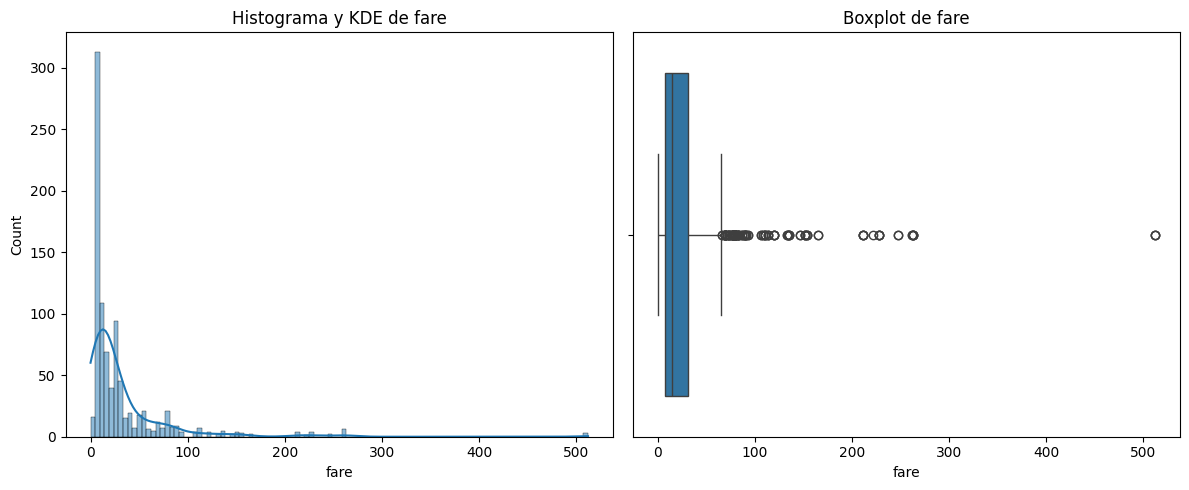

In [78]:
bootcampviztools.plot_combined_graphs(df_titanic, ["fare"])

In [87]:
df_titanic.loc[df_titanic.fare == df_titanic.fare.max()]

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_member,ninio
258,female,35.0,0,0,512.3292,First,woman,False,Cherbourg,yes,True,0,Adulto
679,male,36.0,0,1,512.3292,First,man,True,Cherbourg,yes,False,1,Adulto
737,male,35.0,0,0,512.3292,First,man,True,Cherbourg,yes,True,0,Adulto


Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?
1. No se contabilizo correctamente
2. Fueron tres presonas con Id = 258, 679 y 737 y sobrevivieron los 3

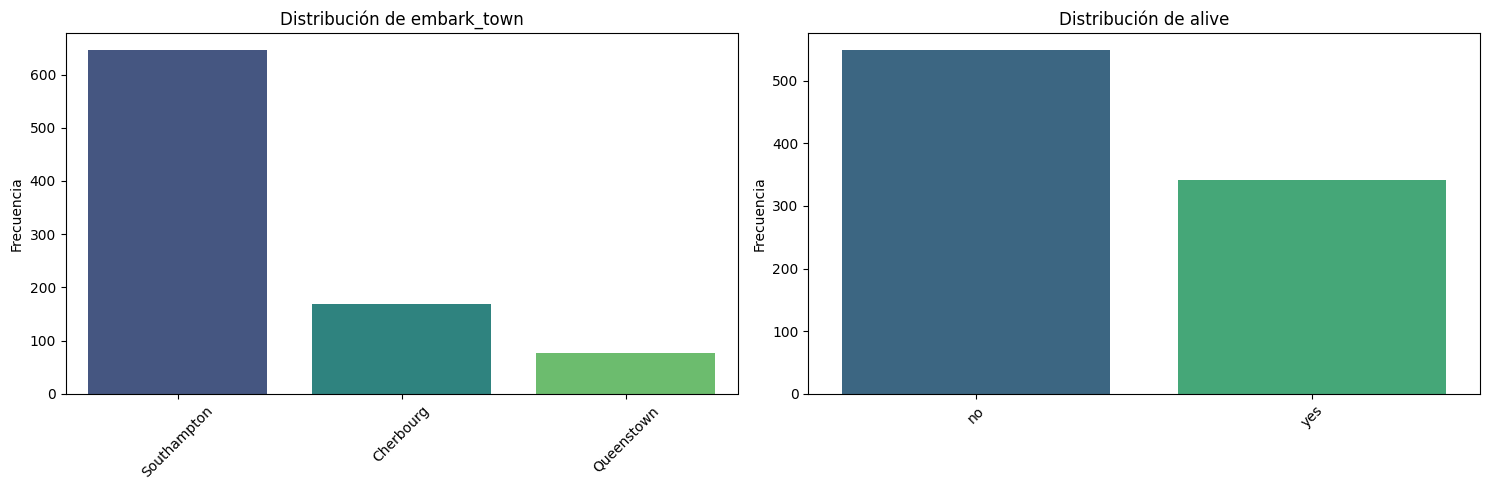

In [88]:
bootcampviztools.pinta_distribucion_categoricas(df_titanic, ["embark_town", "alive"])

In [ ]:
#mi variable directora sera "alive", no se hacerlo con la trifa pero si con las clases


In [99]:
columnas = ["alive","embark_town","class"] 
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

Respuesta no:


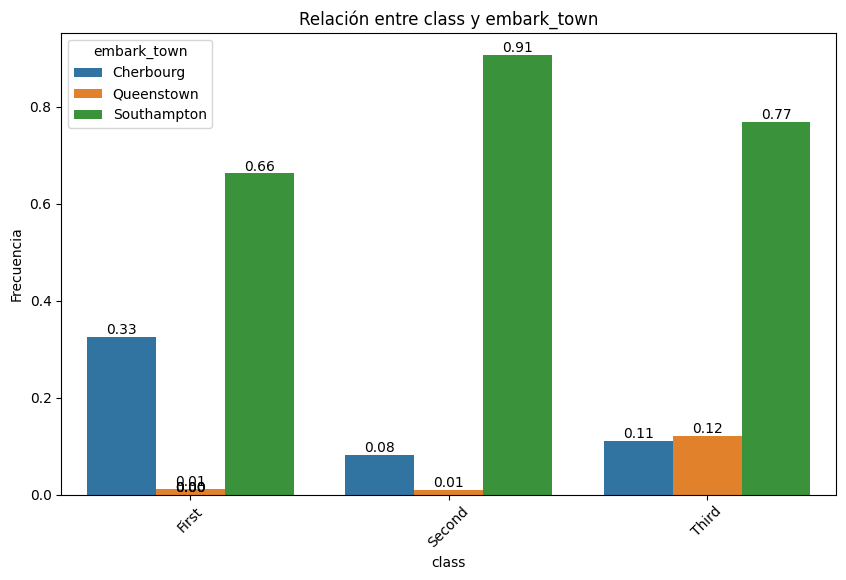

Respuesta yes:


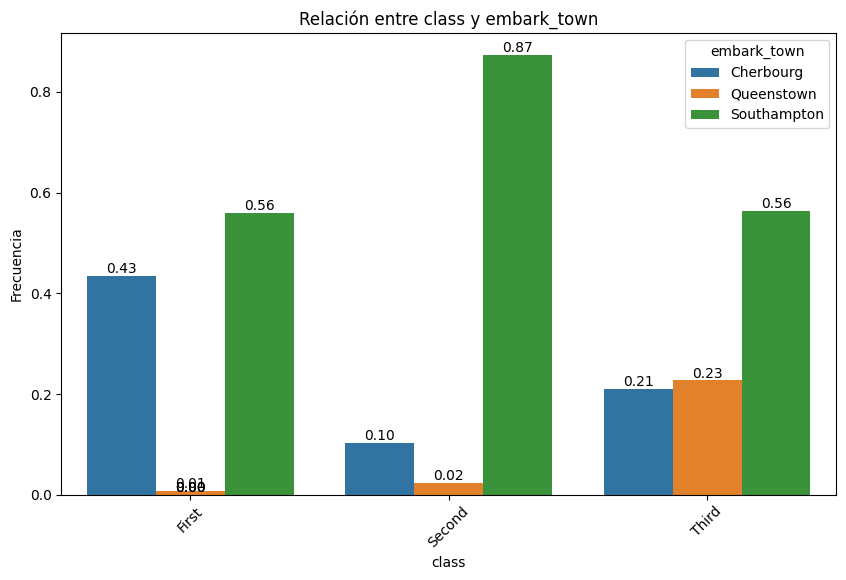

In [100]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    bootcampviztools.plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True)

Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.
1. No hay relacion entre ellas, ya que los porcentajes entre el si y no por ciudad y tarifa son practicamente calcados

Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.

PARTE I  
1. **Establecer objetivos**  
1. **Completar la definición de los datos/Rellenar fichas datasets**
2. **Tipificar los datos**
3. **Priorizar variables** 

PARTE II  
4. **Aplicar tendencia central a todas las variables**  
5. **Analizar las frecuencias de las variables categóricas**: Gráficos de barras   
6. **Analizar las medidas de posición y los rangos de las variables numéricas**: Graficos de Caja  
7. **Analizar las medidas de dispersión de las variables numéricas**  
8. **Analizar las distribuciones de las variables numéricas**: Histogramas y funciones estimadas de densidad (combinados)  
9. **Analizar las anomalías o outliers**: confrontación de histogramas y gráficos de cajas. Umbrales (2-3 desviaciones estándar, 4.5 en tamaño "bigotes")  
10. **Trata los outliers**: separa en dos, elimina, crea una categoría especial...   

PARTE III  
11. **Revisa prioridades, preguntas y notas hasta el momento**  
12. **Preparara el analisis bivariante** en función de la revisión anterior.  
13. **Empieza por categóricas importantes/target**: combinalas con categóricas y numéricas  
14. **Sigue con numéricas importantes/target**  
15. **Analiza las parejas de variables que necesites para contestar tus preguntas**  
    15.1 **Es directo así que: Matriz de correlación, heatmap y pairplot**  
16. **Recapitula**: Clasifica ya tus hallazgos en posibles mensajes, elementos a profundizar, cosas interesantes pero no importantes (descártalas). Añade las preguntas contestadas y la lista de preguntas sin contestar.  

PARTE IV  
17. **Intenta resolver todas las preguntas pendientes**  
18. Si necesitas análisis más complicados (3 o más variables): Planifica muy bien que grupos  
19. Aplica lo visto en estas sesiones, tendrás que probar variaciones hasta llegar a encontrar el punto adecuado.  
20. **Acaba el análisis**: Cierras las preguntas pendientes, lo que te quede por trabajar -> Lineas de trabajo futuro.  
